In [1]:
# install.packages(c('tidyverse', 'wesanderson', 'ggridges',
#                   'reshape', 'lme4', 'coefplot2', 'sjPlot'))

In [2]:
library(tidyverse)
library(wesanderson)
library(ggridges)
library(ggthemes)
library(reshape)
library(lme4)
library(sjPlot)
source("../../../spydr_scripts/functions/get_os.R")

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1     ✔ purrr   0.2.4
✔ tibble  1.4.2     ✔ dplyr   0.7.6
✔ tidyr   0.8.0     ✔ stringr 1.3.0
✔ readr   1.1.1     ✔ forcats 0.3.0
Warning message:
“package ‘dplyr’ was built under R version 3.5.1”── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘reshape’

The following object is masked from ‘package:dplyr’:

    rename

The following objects are masked from ‘package:tidyr’:

    expand, smiths

Loading required package: Matrix

Attaching package: ‘Matrix’

The following object is masked from ‘package:reshape’:

    expand

The following object is masked from ‘package:tidyr’:

    expand

Install package "strengejacke" from GitHub (`devtools::install_github("strengejacke/strengejacke")`) to load all sj-packages at once!


In [3]:
os <- get_os()
if (os == 'linux'){home <- '/home/krista/'
} else if(os == 'osx'){home <- '/Users/67981492/'}

agg_data_path = paste0(home,'Dropbox/volatileValues/simple_rt_experiment_probabilityC/analysis/aggregated_data/')
setwd(agg_data_path)

In [4]:
# clean_df <- read_csv('clean_df.csv',col_types = cols())
# raw_df <- read_csv('raw_df_processed.csv',col_types = cols())
# epoch_df <- read_csv('epoch_df.csv',col_types = cols())

ls_obs_data <- read_csv("combined_learning_sig_obs_data.csv", col_types=cols())
(n_subjects = length(unique(ls_obs_data$ID)))
(n_conditions = length(unique(ls_obs_data$condition)))
n_clean_trials = 600

#format data for regressions (only include trials >= 0)
epoch_ls_df_reg <- subset(ls_obs_data, epoch_trial_zero_idx > -1 & epoch_trial_zero_idx <= 10 & n_epoch_trials >= 10)



Warning message:
“Duplicated column names deduplicated: 'ID' => 'ID_1' [27]”

[1] 24

[1] 4

In [5]:
#scale continuous predictors
epoch_ls_df_reg$cpp_scaled <- scale(epoch_ls_df_reg$cpp)
epoch_ls_df_reg$ideal_B_scaled <- scale(epoch_ls_df_reg$ideal_B)

In [6]:
head(epoch_ls_df_reg)
names(epoch_ls_df_reg)

cpp,target_B,choice_B,cp,gen_drift,gen_bound,ID,b_t0,b_t1,r_t1,⋯,shifted_epoch_trial_zero_idx,repeat_trial,prop_112,n_epoch_trials,p_id_solution,obs_low_val_cue,id_choice,p_id_accuracy,cpp_scaled,ideal_B_scaled
0.09947117,0.0000000,0.0000000,1,0.01357246,0.4164061,761,0.0000000,0.0000000,2.528877,⋯,0,1,0.3055556,36,111,111,111,1,-0.06693282,-0.3699060
0.03507879,0.0000000,0.0000000,0,0.01357246,0.5994712,761,1.3902137,0.1492068,0.000000,⋯,1,2,0.3055556,36,111,112,112,0,-0.43499136,-1.3957726
0.02307522,-1.2410069,1.2410069,0,0.01357246,0.5350788,761,0.7923717,0.1965910,0.000000,⋯,2,3,0.3055556,36,111,112,111,1,-0.50360225,-0.8624025
0.01988090,-0.5957808,0.5957808,0,-1.00000000,0.5230752,761,0.5328022,0.2266674,0.000000,⋯,3,4,0.3055556,36,111,112,112,0,-0.52186055,-0.6229695
0.01853869,-0.3061348,0.3061348,0,-1.00000000,0.5198809,761,0.3913762,0.2519824,0.000000,⋯,4,5,0.3055556,36,111,112,111,1,-0.52953246,-0.4851345
0.26853762,-0.1393938,0.1393938,0,-1.00000000,0.5185387,761,0.3028040,0.2751190,3.036967,⋯,5,6,0.3055556,36,111,111,111,1,0.89942912,-0.3927915


[1] "cpp"                          "target_B"                    
 [3] "choice_B"                     "cp"                          
 [5] "gen_drift"                    "gen_bound"                   
 [7] "ID"                           "b_t0"                        
 [9] "b_t1"                         "r_t1"                        
[11] "r_t2"                         "obs_cp"                      
[13] "ideal_B"                      "B_ideal_target"              
[15] "B_nonideal_target"            "LR_choice"                   
[17] "obs_LR_accuracy"              "obs_LR_solution"             
[19] "reward"                       "cumulative_reward"           
[21] "rt"                           "total_trial_time"            
[23] "iti"                          "cp_with_slow_fast"           
[25] "obs_cp_with_slow_fast"        "obs_high_val_cue"            
[27] "ID_1"                         "condition"                   
[29] "coded_condition"              "original_trial"              
[31] "epoch_n"                      "epoch_trial"                 
[33] "shifted_epoch_trial"          "max_epoch_n"                 
[35] "epoch_trial_zero_idx"         "epoch_trial_one_idx"         
[37] "shifted_epoch_trial_zero_idx" "repeat_trial"                
[39] "prop_112"                     "n_epoch_trials"              
[41] "p_id_solution"                "obs_low_val_cue"             
[43] "id_choice"                    "p_id_accuracy"               
[45] "cpp_scaled"                   "ideal_B_scaled"

In [7]:
sum(epoch_ls_df_reg$ID == epoch_ls_df_reg$ID_1) == nrow(epoch_ls_df_reg)
epoch_ls_df_reg$ID_1 <- NULL 

[1] TRUE

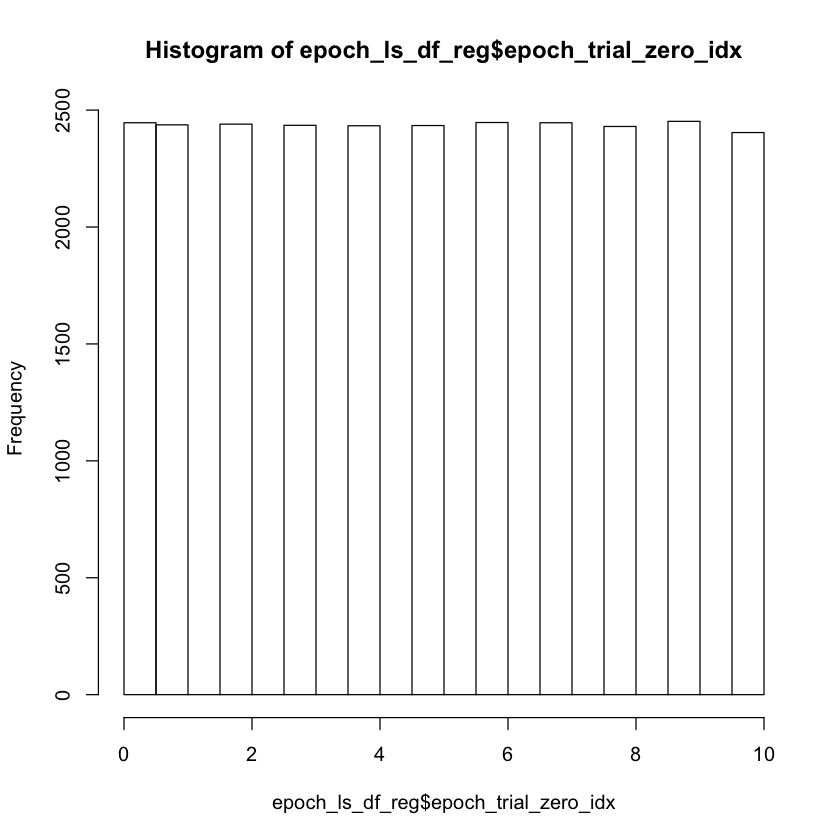

In [8]:
#check subsetting
hist(epoch_ls_df_reg$epoch_trial_zero_idx)

In [9]:
names(epoch_ls_df_reg)

[1] "cpp"                          "target_B"                    
 [3] "choice_B"                     "cp"                          
 [5] "gen_drift"                    "gen_bound"                   
 [7] "ID"                           "b_t0"                        
 [9] "b_t1"                         "r_t1"                        
[11] "r_t2"                         "obs_cp"                      
[13] "ideal_B"                      "B_ideal_target"              
[15] "B_nonideal_target"            "LR_choice"                   
[17] "obs_LR_accuracy"              "obs_LR_solution"             
[19] "reward"                       "cumulative_reward"           
[21] "rt"                           "total_trial_time"            
[23] "iti"                          "cp_with_slow_fast"           
[25] "obs_cp_with_slow_fast"        "obs_high_val_cue"            
[27] "condition"                    "coded_condition"             
[29] "original_trial"               "epoch_n"                     
[31] "epoch_trial"                  "shifted_epoch_trial"         
[33] "max_epoch_n"                  "epoch_trial_zero_idx"        
[35] "epoch_trial_one_idx"          "shifted_epoch_trial_zero_idx"
[37] "repeat_trial"                 "prop_112"                    
[39] "n_epoch_trials"               "p_id_solution"               
[41] "obs_low_val_cue"              "id_choice"                   
[43] "p_id_accuracy"                "cpp_scaled"                  
[45] "ideal_B_scaled"

In [10]:
#make sure that only epoch_trials 0-10 are included [none from prev. epoch]
range(epoch_ls_df_reg$epoch_trial_zero_idx)

[1]  0 10

In [11]:
#use vectors of generative conflict and volatility parameters as predictors 
high_conflict_p = 0.65
mod_conflict_p = 0.75
low_conflict_p = 0.85

high_vol_lambda = 15
mod_vol_lambda = 25
low_vol_lambda = 35 

#generative conflict
epoch_ls_df_reg[epoch_ls_df_reg$condition == 'hc', 'conflict_p'] = high_conflict_p
epoch_ls_df_reg[epoch_ls_df_reg$condition == 'lc', 'conflict_p'] = low_conflict_p
epoch_ls_df_reg[epoch_ls_df_reg$condition == 'hv', 'conflict_p'] = mod_conflict_p
epoch_ls_df_reg[epoch_ls_df_reg$condition == 'lv', 'conflict_p'] = mod_conflict_p

#generative volatility
epoch_ls_df_reg[epoch_ls_df_reg$condition == 'hv', 'volatility_lambda'] = high_vol_lambda
epoch_ls_df_reg[epoch_ls_df_reg$condition == 'lv', 'volatility_lambda'] = low_vol_lambda
epoch_ls_df_reg[epoch_ls_df_reg$condition == 'hc', 'volatility_lambda'] = mod_vol_lambda
epoch_ls_df_reg[epoch_ls_df_reg$condition == 'lc', 'volatility_lambda'] = mod_vol_lambda

In [12]:
#separate regressions for conflict & volatility 
head(epoch_ls_df_reg$condition)

# epoch_ls_df_reg$conflict <- as.factor(epoch_ls_df_reg$conflict)
# epoch_ls_df_reg$vol <- as.factor(epoch_ls_df_reg$vol)

epoch_ls_df_reg$cpp_scaled = scale(epoch_ls_df_reg$cpp)
epoch_ls_df_reg$ideal_B_scaled = scale(epoch_ls_df_reg$ideal_B)
epoch_ls_df_reg$volatility_lambda_scaled = scale(epoch_ls_df_reg$volatility_lambda)
epoch_ls_df_reg$conflict_p_scaled = scale(epoch_ls_df_reg$conflict_p)


epoch_ls_df_reg$log_rt <- log(epoch_ls_df_reg$rt)

#create two distinct dfs
conflict_epoch_ls_df_reg <- subset(epoch_ls_df_reg, condition == 'hc' | condition == 'lc')
vol_epoch_ls_df_reg <- subset(epoch_ls_df_reg, condition == 'hv' | condition == 'lv')

[1] "hc" "hc" "hc" "hc" "hc" "hc"

In [13]:
epoch_ls_df_reg_contin <- cor(epoch_ls_df_reg[,c("cpp","target_B",
                                             "choice_B", "ideal_B", "rt", 
                                             "gen_drift", "gen_bound", "epoch_trial" )])

# Three primary predictors: time (epoch_trial), conflict & volatility parameters, and random effect of subject (slope & intercept)

### Model slope for each participant changing by level of conflict/volatility by epoch_trial

In [15]:
vol_rt_reg <- lmer(log_rt ~ volatility_lambda_scaled*epoch_trial  + (1+volatility_lambda_scaled:epoch_trial| ID), vol_epoch_ls_df_reg)
vol_acc_reg <- glmer(p_id_accuracy ~ volatility_lambda_scaled*epoch_trial  + (1+volatility_lambda_scaled:epoch_trial | ID),  family = 'binomial', vol_epoch_ls_df_reg)

Computing p-values via Wald-statistics approximation (treating t as Wald z).


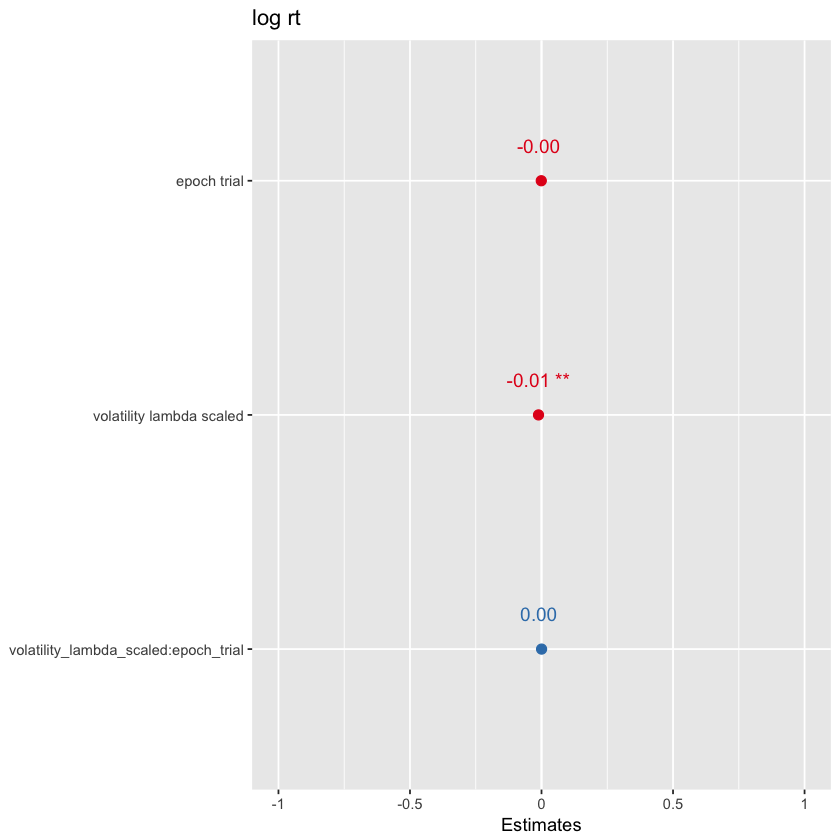

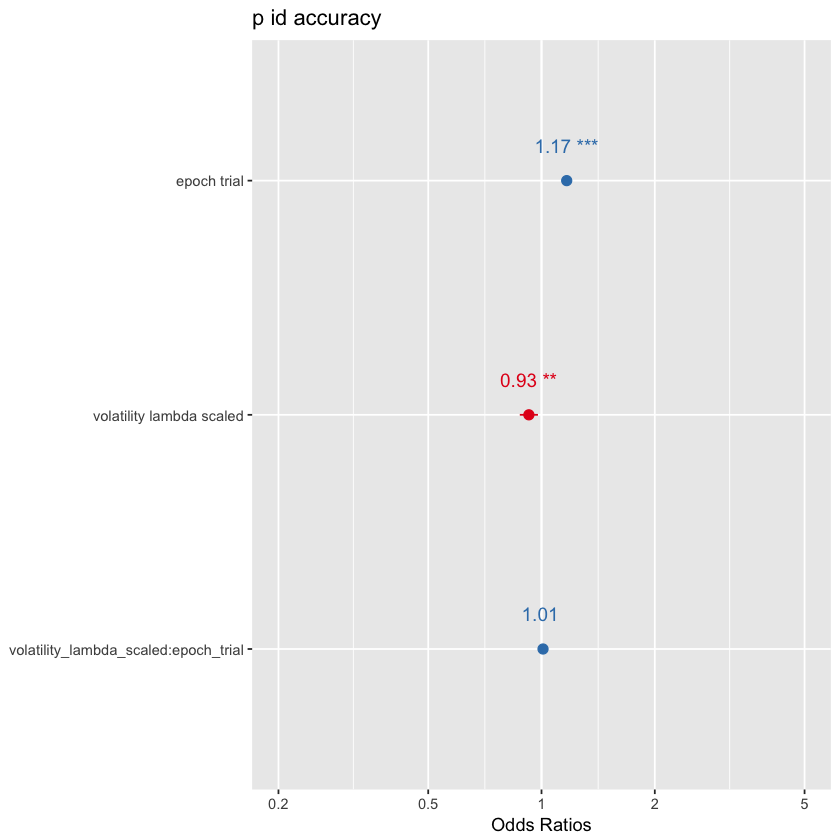

In [16]:
plot_model(vol_rt_reg,show.values=TRUE, show.data=TRUE)
plot_model(vol_acc_reg,show.values=TRUE, show.data=TRUE)

In [17]:
conf_rt_reg <- lmer(log_rt ~ conflict_p_scaled*epoch_trial + (1+conflict_p_scaled:epoch_trial| ID), conflict_epoch_ls_df_reg)
conf_acc_reg <- glmer(p_id_accuracy ~ conflict_p_scaled*epoch_trial + (1+conflict_p_scaled:epoch_trial | ID),  family = 'binomial', conflict_epoch_ls_df_reg)

Computing p-values via Wald-statistics approximation (treating t as Wald z).


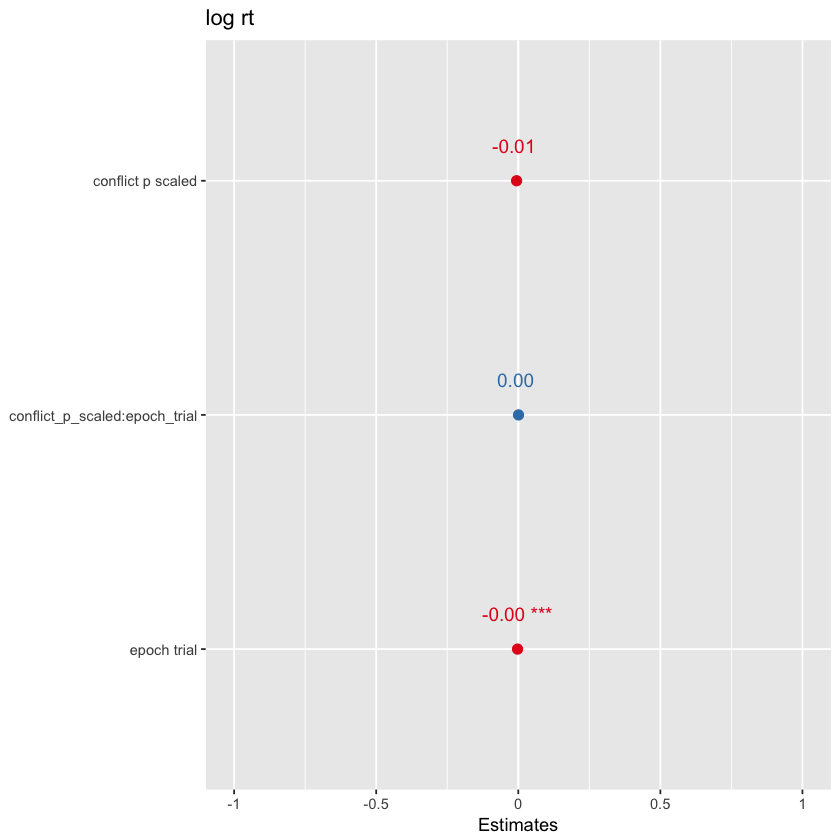

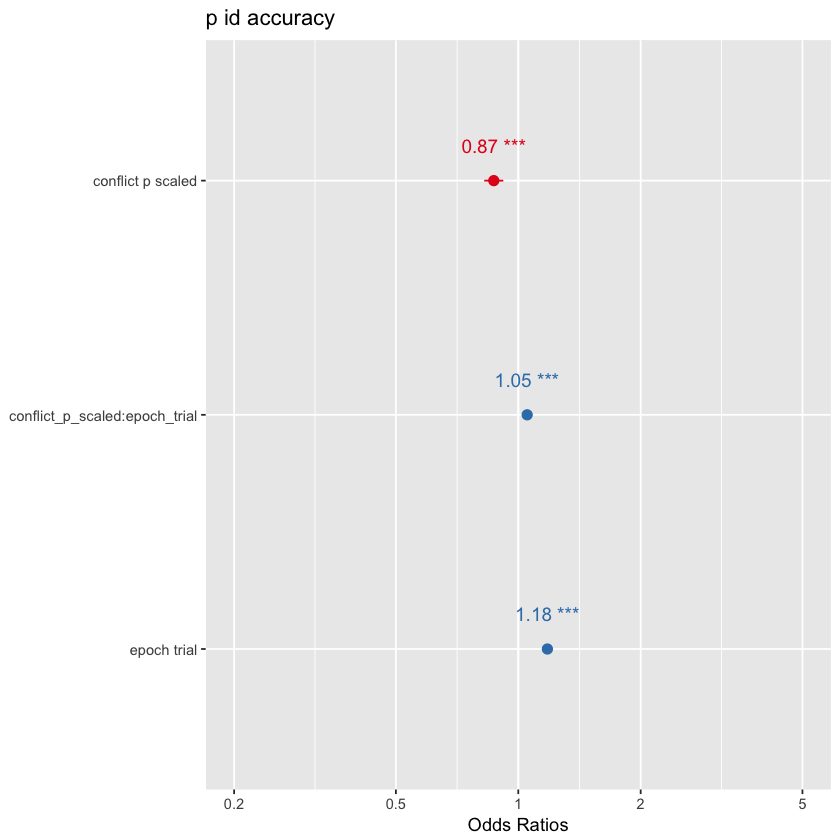

In [18]:
plot_model(conf_rt_reg, show.values=TRUE, show.data=TRUE)
plot_model(conf_acc_reg, show.values=TRUE, show.data=TRUE)

## check homogeneity of variance

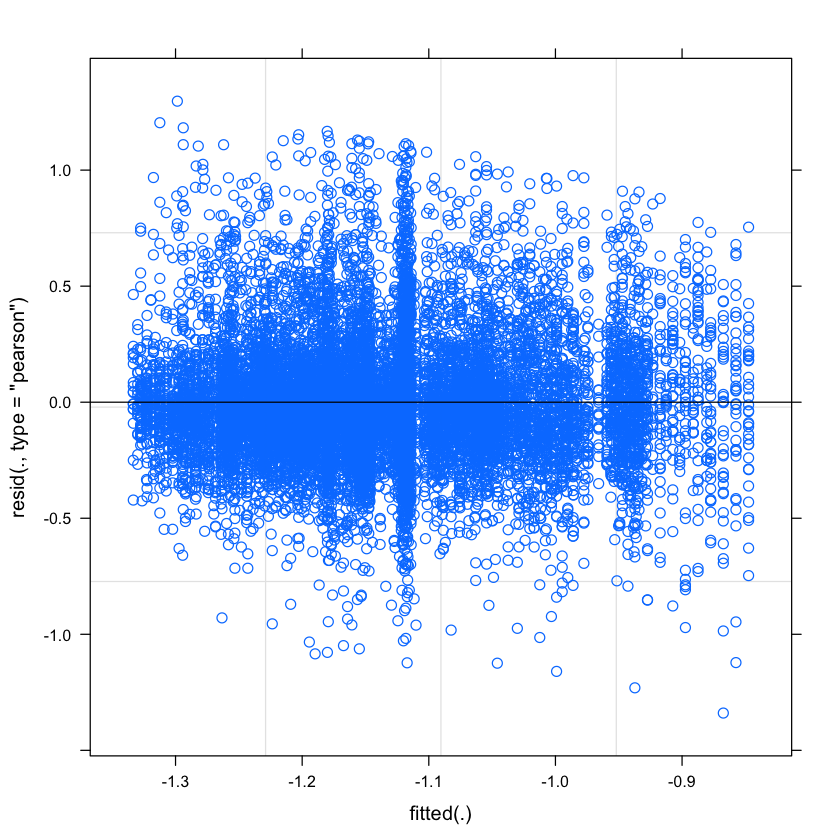

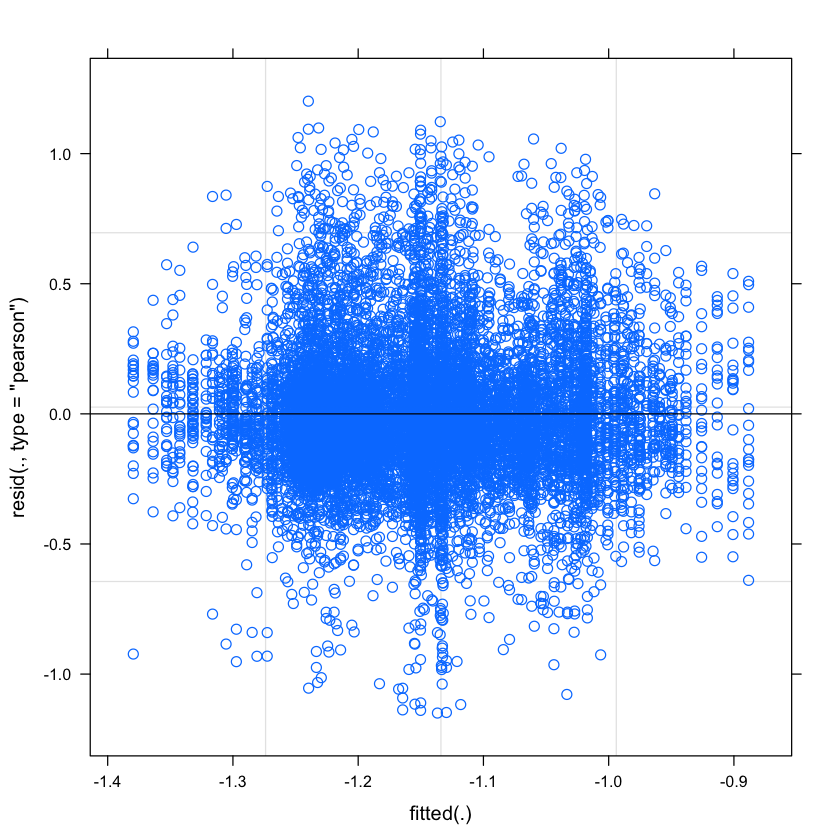

In [19]:
plot(vol_rt_reg); plot(conf_rt_reg)

## check normality of residuals

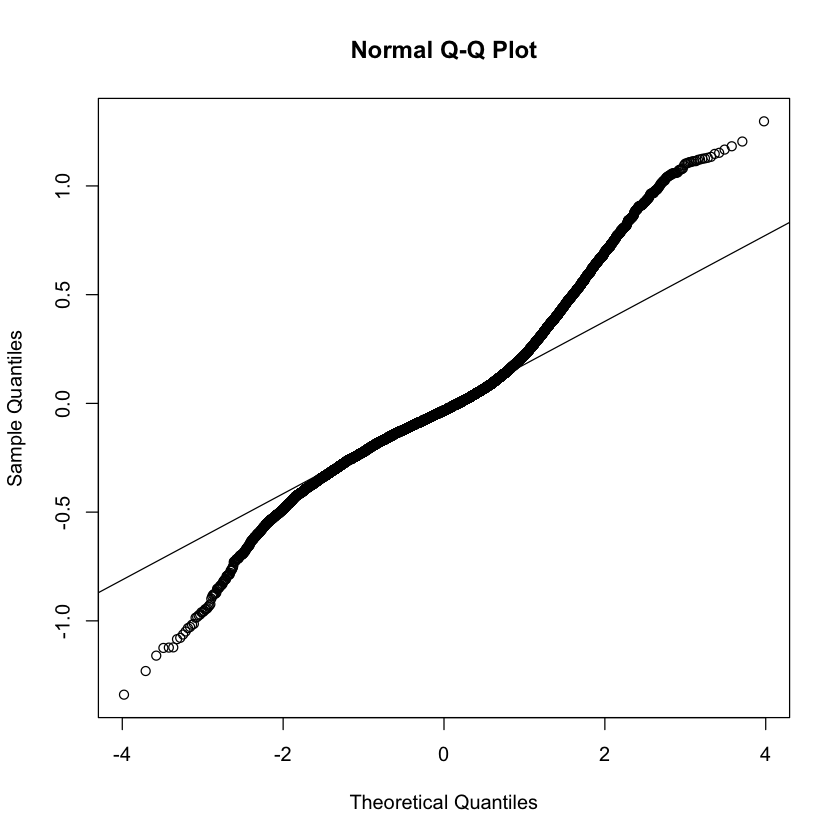

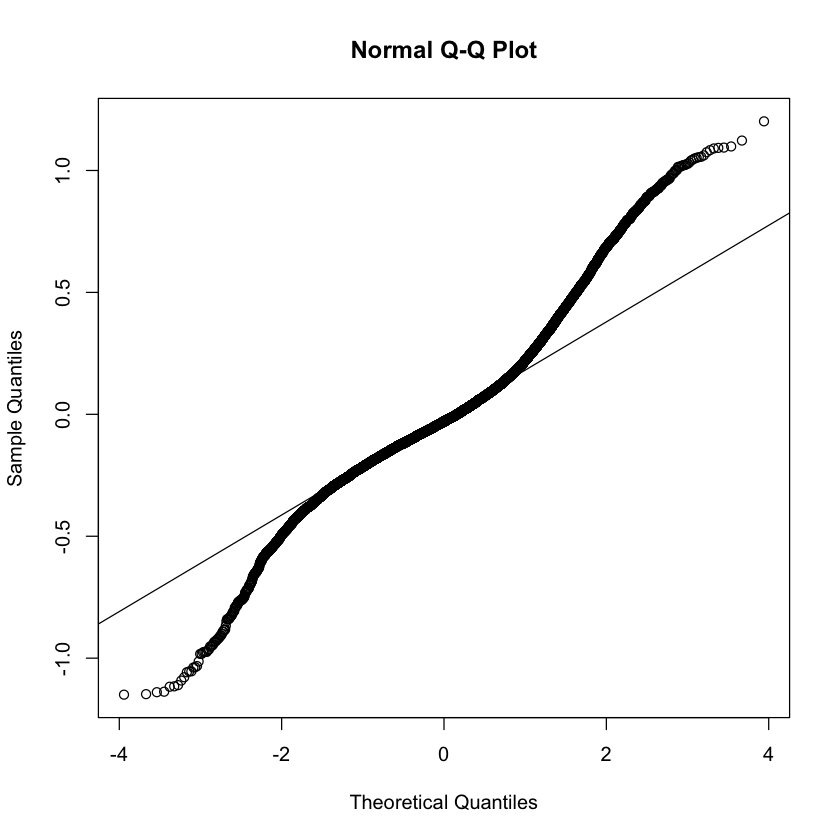

In [20]:
qqnorm(residuals(vol_rt_reg)); 
qqline(residuals(vol_rt_reg))

qqnorm(residuals(conf_rt_reg))
qqline(residuals(conf_rt_reg))


# Estimate confidence intervals 

In [31]:
# #bootstrap functions for fixed effects 
# library(boot)
# rt_lm <- function(formula, data, indices) {
#   d <- data[indices,] 
#   fit <- lmer(formula, data=d)
#   return(fixef(fit))
# } 

# acc_log <- function(formula, data, indices) {
#   d <- data[indices,] 
#   fit <- glmer(formula, data=d, family=binomial)
#   return(fixef(fit))
# } 

In [32]:
vol_rt_formula <- log_rt ~ volatility_lambda_scaled*epoch_trial  + (1+volatility_lambda_scaled:epoch_trial| ID)
vol_acc_formula <- p_id_accuracy ~ volatility_lambda_scaled*epoch_trial  + (1+volatility_lambda_scaled:epoch_trial | ID)


vol_rt_lm_boot <- boot(formula=vol_rt_formula, data=vol_epoch_ls_df_reg, statistic=rt_lm, 
  	R=1000)
vol_acc_log_boot <- boot(formula=vol_acc_formula, data=vol_epoch_ls_df_reg, statistic=acc_log, 
  	R=1000)

Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv, :
“Model failed to converge with max|grad| = 0.00535794 (tol = 0.002, component 1)”Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv, :
“Model failed to converge with max|grad| = 0.00153615 (tol = 0.001, component 1)”Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv, :
“Model failed to converge with max|grad| = 0.00152057 (tol = 0.001, component 1)”Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv, :
“Model failed to converge with max|grad| = 0.00138782 (tol = 0.001, component 1)”Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv, :
“Model failed to converge with max|grad| = 0.00106421 (tol = 0.001, component 1)”Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv, :
“Model failed to converge with max|grad| = 0.00184039 (tol = 0.001, compo

In [45]:
conflict_rt_formula <- log_rt ~ conflict_p_scaled*epoch_trial  + (1+conflict_p_scaled:epoch_trial| ID)
conflict_acc_formula <- p_id_accuracy ~ conflict_p_scaled*epoch_trial  + (1+conflict_p_scaled:epoch_trial | ID)


conflict_rt_lm_boot <- boot(formula=conflict_rt_formula, data=conflict_epoch_ls_df_reg, statistic=rt_lm, 
  	R=1000)
conflict_acc_log_boot <- boot(formula=conflict_acc_formula, data=conflict_epoch_ls_df_reg, statistic=acc_log, 
  	R=1000)

Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv, :
“Model failed to converge with max|grad| = 0.00174999 (tol = 0.001, component 1)”Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv, :
“Model failed to converge with max|grad| = 0.00159654 (tol = 0.001, component 1)”Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv, :
“Model failed to converge with max|grad| = 0.00115306 (tol = 0.001, component 1)”Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv, :
“Model failed to converge with max|grad| = 0.00126674 (tol = 0.001, component 1)”Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv, :
“Model failed to converge with max|grad| = 0.00211126 (tol = 0.001, component 1)”Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv, :
“Model failed to converge with max|grad| = 0.00115483 (tol = 0.001, compo

“Model failed to converge with max|grad| = 0.0012883 (tol = 0.001, component 1)”Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv, :
“Model failed to converge with max|grad| = 0.00243721 (tol = 0.001, component 1)”Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv, :
“Model failed to converge with max|grad| = 0.00107314 (tol = 0.001, component 1)”Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv, :
“Model failed to converge with max|grad| = 0.00122666 (tol = 0.001, component 1)”Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv, :
“Model failed to converge with max|grad| = 0.00182473 (tol = 0.001, component 1)”Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv, :
“Model failed to converge with max|grad| = 0.00128583 (tol = 0.001, component 1)”Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkC

In [27]:
# #odds ratios
# odds <-  exp(acc_log_boot$)
# p <- odds / (1 + odds)